# Multivariate Polynomial Regression

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Import OSNIR Dataset and shuffle data

In [4]:
# import OSNIR dataset
df = pd.read_csv('../Data/OSNIR_values_extendedv3_new datasetbcsv.csv')
# shuffling rows of OSNIR dataframe and reset indexes
df = df.sample(frac=1)
df.reset_index(inplace=True, drop=True)

Divide data into\
1800 values for training (0,1800-1)\
600 values for validation (1800,2400-1)\
600 values for testing (2400,3000-1)\

In [5]:
data = np.array(df)
# input x aka Ns, Pch, L, B, GB, Nch values
x_train = data[0:1800-1, 1:7]
x_valid = data[1800:2400-1, 1:7]
x_test = data[2400:3000-1, 1:7]

# output y aka OSNIR values
y_train = data[0:1800-1, 0]
y_valid = data[1800:2400-1, 0]
y_test = data[2400:3000-1, 0]

#### Create the Multivariate Polynomial Regression Model

In [10]:
#MPR model
model_PF = PolynomialFeatures(degree=2)
x_train_PF = model_PF.fit_transform(x_train)

#Fit Linear Model with Polynomial Features
model = LinearRegression().fit(x_train_PF,y_train)


In [13]:
OSNIR_num = data[:3000-1,0]
Input_num = model_PF.fit_transform(data[:3000-1,1:7])


In [14]:
OSNIR_est = (model.predict(Input_num))

In [15]:
for i in range(10):
    print('%s => %f (expected %f)' % (Input_num[i].tolist(), OSNIR_est[i], OSNIR_num[i] ))

[1.0, 18.0, 0.0, 100.0, 25.0, 0.0, 3.0, 324.0, 0.0, 1800.0, 450.0, 0.0, 54.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10000.0, 2500.0, 0.0, 300.0, 625.0, 0.0, 75.0, 0.0, 0.0, 9.0] => 14.137986 (expected 14.339905)
[1.0, 11.0, -5.0, 10.0, 12.5, 0.0, 9.0, 121.0, -55.0, 110.0, 137.5, 0.0, 99.0, 25.0, -50.0, -62.5, -0.0, -45.0, 100.0, 125.0, 0.0, 90.0, 156.25, 0.0, 112.5, 0.0, 0.0, 81.0] => 27.522271 (expected 27.196946)
[1.0, 14.0, -2.0, 50.0, 50.0, 0.0, 9.0, 196.0, -28.0, 700.0, 700.0, 0.0, 126.0, 4.0, -100.0, -100.0, -0.0, -18.0, 2500.0, 2500.0, 0.0, 450.0, 2500.0, 0.0, 450.0, 0.0, 0.0, 81.0] => 20.828318 (expected 21.397912)
[1.0, 8.0, 0.0, 10.0, 25.0, 0.0, 15.0, 64.0, 0.0, 80.0, 200.0, 0.0, 120.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 250.0, 0.0, 150.0, 625.0, 0.0, 375.0, 0.0, 0.0, 225.0] => 24.754576 (expected 23.796158)
[1.0, 37.0, -6.0, 100.0, 25.0, 0.0, 9.0, 1369.0, -222.0, 3700.0, 925.0, 0.0, 333.0, 36.0, -600.0, -150.0, -0.0, -54.0, 10000.0, 2500.0, 0.0, 900.0, 625.0, 0.0, 225.0, 0.0, 0.0, 81.0] => 

In [16]:
Mism = np.zeros(3000-1)
for i in range(3000-1):
    Mism[i] = OSNIR_num[i] - OSNIR_est[i]

In [17]:
pred_df = pd.DataFrame({"Actual OSNIR (dB)" : OSNIR_num.tolist(), "Predicted OSNIR (dB)" : OSNIR_est.tolist(), "Difference (dB)" : Mism.tolist()})
pred_df.to_csv("OSNIR_Prediction_LR.csv",index=False)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01033678, 0.05401801,
        0.13204401, 0.22140714, 0.22574191, 0.18572858, 0.10703568,
        0.02834278, 0.01433811, 0.00633545, 0.00366789, 0.00233411,
        0.00233411, 0.00266756, 0.003001  , 0.        , 0.        ,
        0.        , 0.00066689, 0.        , 0.        , 0.        ]),
 array([-10.        ,  -9.42857143,  -8.85714286,  -8.28571429,
         -7.71428571,  -7.14285714,  -6.57142857,  -6.        ,
         -5.42857143,  -4.85714286,  -4.28571429,  -3.71428571,
         -3.14285714,  -2.57142857,  -2.        ,  -1.42857143,
         -0.85714286,  -0.28571429,   0.28571429,   0.85714286,
          1.42857143,   2.        ,   2.57142857,   3.14285714,
          3.71428571,   4.28571429,   4.85714286,   5.42857143,
          6.        ,   6.57142857,   7.14285714,   7.71428571,
          

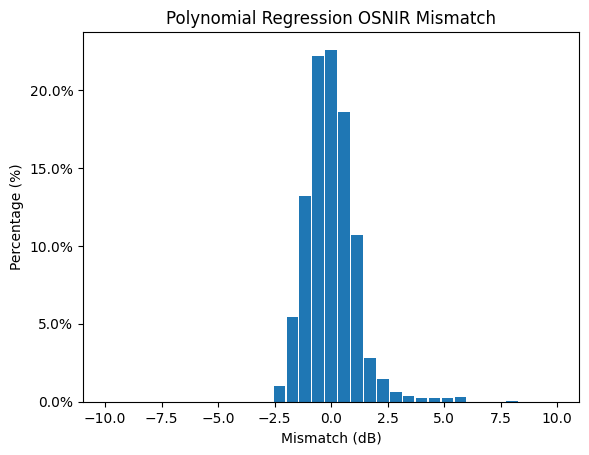

In [18]:
plt.title('Polynomial Regression OSNIR Mismatch')
plt.xlabel('Mismatch (dB)')
plt.ylabel('Percentage (%)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.hist(Mism, range=(-10,10), rwidth=0.9, bins=35, weights=np.ones(len(Mism))/len(Mism))